## Visualization

### Use TL to replace encoder layer of FCN

In [1]:
## Data generation

In [2]:
from tl_fcn import *
from utils import *
import torch.optim as optim
import time
from torch.utils.data import DataLoader
import torch
import gc
import copy
from dataloader_4 import *
from starter_4 import *

in starter_4
GPU_STATUS: True


In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

test_dataset = TASDataset('tas500v1.1', eval_mode=True, mode='test')
test_loader = DataLoader(dataset=test_dataset, batch_size= batch_size, shuffle=False)

/opt/conda/lib/python3.9/site-packages/torchvision/transforms/functional.py:114: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  img = torch.from_numpy(pic.transpose((2, 0, 1))).contiguous()


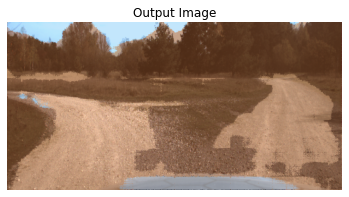

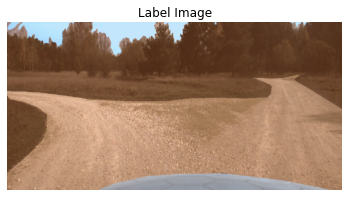

0

In [4]:
# 4a
visualize("latest_model_4a", test_loader, device)

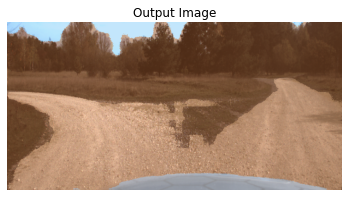

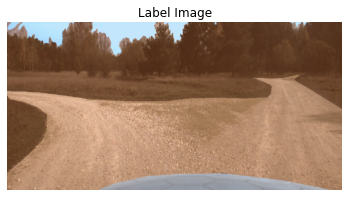

0

In [5]:
# 4b
visualize("latest_model_4b", test_loader, device)

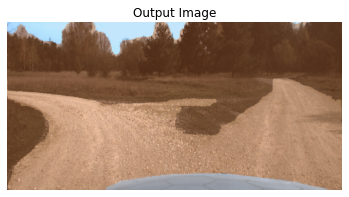

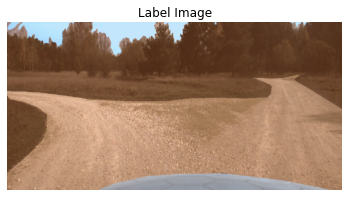

0

In [6]:
# 5b
visualize("latest_model_5b", test_loader, device)